### Visualization in Jupyter Lab

In [192]:
%matplotlib inline

### Import libararies

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

### Load data

In [194]:
main_data = pd.read_csv('dataset/ted_main.csv')
trans_data = pd.read_csv('dataset/transcripts.csv')

In [195]:
md = main_data.copy()
td = trans_data.copy()

## Transcripts.csv

In [196]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Columns: 253 entries, transcript to Unnamed: 252
dtypes: object(253)
memory usage: 4.8+ MB


In [197]:
td.head(2)

,transcript,url,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
use_full_columns = ["transcript","url"]

In [199]:
#Selecting usefull columns decreased memory usage.
#It was: 4.8 MB
#Now: 38.7 KB
td = td[use_full_columns]

In [200]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2471 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [201]:
td.head(2)

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...


## Ted_main.csv

In [202]:
md.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


In [203]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

### Change types

In [204]:
md['comments'] = md['comments'].astype('int32')
md['description'] = md['description'].str.lower().str.strip()
md['duration'] = md['duration'].astype('int32')
md['event'] = md['event'].astype('category').str.lower().str.strip()
md['film_date'] = pd.to_datetime(md['film_date'], unit='s')
md['languages'] = md['languages'].astype('int32')
md['main_speaker'] = md['main_speaker'].str.lower().str.strip()
md['name'] = md['name'].str.lower().str.strip()
md['num_speaker'] = md['num_speaker'].astype('int32')
md['published_date'] = pd.to_datetime(md['published_date'], unit='s')
md['speaker_occupation'] = md['speaker_occupation'].astype('category').str.lower().str.strip()
md['title'] = md['title'].str.lower().str.strip()

In [205]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2550 non-null   int32         
 1   description         2550 non-null   object        
 2   duration            2550 non-null   int32         
 3   event               2550 non-null   object        
 4   film_date           2550 non-null   datetime64[ns]
 5   languages           2550 non-null   int32         
 6   main_speaker        2550 non-null   object        
 7   name                2550 non-null   object        
 8   num_speaker         2550 non-null   int32         
 9   published_date      2550 non-null   datetime64[ns]
 10  ratings             2550 non-null   object        
 11  related_talks       2550 non-null   object        
 12  speaker_occupation  2544 non-null   object        
 13  tags                2550 non-null   object      

In [206]:
#Don't need film_date,  published_date is enough
md.drop('film_date', axis=1, inplace= True)

### Unpack ratings, related talks, tags

In [207]:
#unpack ratings
md.ratings = md.ratings.apply(ast.literal_eval)
md.ratings[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [208]:
def co(i):
    counts = 0
    for item in i:
        counts += item["count"]
    return counts

In [209]:
#Add new columns
for i, rate in enumerate(md.ratings):
    maximum = ["", 0]
    for item in rate:
        md.loc[i, item['name'].lower()] = item['count']
        #Add a column which shows which rated object has the most value
        if item['count'] > maximum[1]:   
            maximum = [item['name'].lower(), item['count']]
    md.loc[i, 'maximum-rated'] = maximum[0]

In [210]:
#Add total rating count
md["rating-count"] = md.ratings.apply(lambda x: co(x))
md.head(2)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,informative,fascinating,unconvincing,persuasive,jaw-dropping,ok,obnoxious,inspiring,maximum-rated,rating-count
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,7346.0,10581.0,300.0,10704.0,4439.0,1174.0,209.0,24924.0,inspiring,93850
1,265,with the same humor and humanity he exuded in ...,977,ted2006,43,al gore,al gore: averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",...,443.0,132.0,258.0,268.0,116.0,203.0,131.0,413.0,funny,2936


In [211]:
#unpack related_talks
md.related_talks = md.related_talks.apply(ast.literal_eval)
md.related_talks[0]

[{'id': 865,
  'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg',
  'speaker': 'Ken Robinson',
  'title': 'Bring on the learning revolution!',
  'duration': 1008,
  'slug': 'sir_ken_robinson_bring_on_the_revolution',
  'viewed_count': 7266103},
 {'id': 1738,
  'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg',
  'speaker': 'Ken Robinson',
  'title': "How to escape education's death valley",
  'duration': 1151,
  'slug': 'ken_robinson_how_to_escape_education_s_death_valley',
  'viewed_count': 6657572},
 {'id': 2276,
  'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg',
  'speaker': 'Linda Cliatt-Wayman',
  'title': 'How to fix a broken school? Lead fearlessly, love hard',
  'duration': 1027,
  'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard',
  'viewed_count': 1617101},
 {'id': 892,
  'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb58

In [212]:
#unpack tags
md.tags = md.tags.apply(ast.literal_eval)
md.tags[0]

['children',
 'creativity',
 'culture',
 'dance',
 'education',
 'parenting',
 'teaching']

### Which TED Talk has the most rating?

In [225]:
columns = ['title', 'rating-count', 'maximum-rated', 'speaker_occupation']

In [226]:
rating_count = md.sort_values(by='rating-count',ascending=False)
rating_count[columns].head(10)

,title,rating-count,maximum-rated,speaker_occupation
0,do schools kill creativity?,93850,inspiring,author/educator
201,my stroke of insight,70665,inspiring,neuroanatomist
1346,your body language may shape who you are,65968,inspiring,social psychologist
837,the power of vulnerability,60078,inspiring,vulnerability researcher
677,how great leaders inspire action,56779,inspiring,leadership expert
1030,how to live before you die,38158,inspiring,visionary
1129,the happy secret to better work,32180,inspiring,psychologist
1163,the power of introverts,30037,inspiring,quiet revolutionary
176,underwater astonishments,30011,fascinating,oceanographer
530,the danger of a single story,29775,inspiring,novelist


### Which TED Talk is funniest?

In [228]:
#By unpacking rate, we can fine the funniest or other kind of rating
columns = ['title', 'rating-count', 'maximum-rated','funny', "speaker_occupation"]
md[columns].sort_values(by="funny", ascending=False).head()

,title,rating-count,maximum-rated,funny,speaker_occupation
0,do schools kill creativity?,93850,inspiring,19645.0,author/educator
2114,this is what happens when you reply to spam email,12366,funny,7731.0,comedian and writer
2161,inside the mind of a master procrastinator,22309,funny,7445.0,blogger
1129,the happy secret to better work,32180,inspiring,7315.0,psychologist
675,"lies, damned lies and statistics (about tedtalks)",10527,funny,5552.0,data scientist


### Which TED Talk has the most discussion?

In [229]:
#As published_date is diffrenet, it's a good measure to find a TED Talk which have most dsicussions
md['views-per-comment'] = md ['views'] / md['comments'] 

In [230]:
md.head(1)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,persuasive,jaw-dropping,ok,obnoxious,inspiring,maximum-rated,rating-count,views-per-comment,months,year
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,10704.0,4439.0,1174.0,209.0,24924.0,inspiring,93850,10372.745443,6,2006


In [231]:
#Sort by views-per-comment
v_p_c = md.sort_values(by='views-per-comment',ascending=False)
v_p_c.head(2)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,persuasive,jaw-dropping,ok,obnoxious,inspiring,maximum-rated,rating-count,views-per-comment,months,year
2534,2,what the astronauts felt when they saw earth f...,725,tedxskoll,1,benjamin grant,benjamin grant: what it feels like to see eart...,1,2017-09-07 20:00:38,"[{'id': 10, 'name': 'Inspiring', 'count': 46},...",...,18.0,17.0,3.0,3.0,46.0,informative,221,323087.0,9,2017
2501,3,"meet françoise mouly, the new yorker's art dir...",509,tednyc,12,françoise mouly,françoise mouly: the stories behind the new yo...,1,2017-08-03 14:24:04,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...",...,9.0,2.0,1.0,1.0,13.0,informative,97,279680.0,8,2017


In [232]:
columns = ['title', 'views-per-comment', 'rating-count', 'maximum-rated', 'speaker_occupation']
v_p_c[columns].head(3)

,title,views-per-comment,rating-count,maximum-rated,speaker_occupation
2534,what it feels like to see earth from space,323087.0,221,informative,author
2501,the stories behind the new yorker's iconic covers,279680.0,97,informative,art editor
2542,living sculptures that stand for history's truths,180696.0,181,courageous,artist


### Split year and month

In [233]:
#split year and month
md['months']=md['published_date'].dt.month
md['year']=md['published_date'].dt.year

In [234]:
#Which months are most popular among TED and TEDx chapters?
md.months.value_counts()

4     256
9     232
5     229
6     228
3     228
10    224
1     215
7     204
2     203
11    189
8     178
12    164
Name: months, dtype: int64

/home/tweet/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months', ylabel='count'>

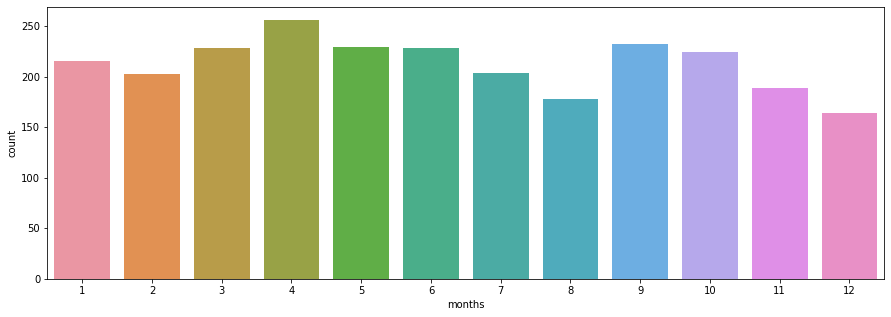

In [235]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(md['months'])

In [236]:
#Which year are most popular among TED and TEDx chapters?
md['year'].value_counts()

2012    306
2011    261
2010    257
2013    244
2016    243
2014    240
2009    222
2015    220
2017    197
2008    188
2007    122
2006     50
Name: year, dtype: int64

/home/tweet/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

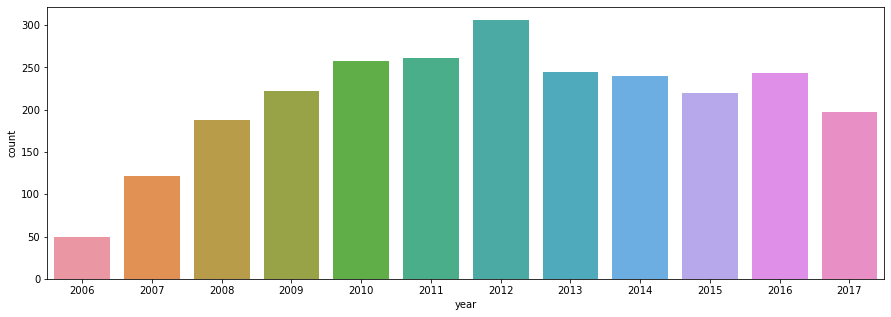

In [237]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(md['year'])

In [238]:
md.head(1)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,persuasive,jaw-dropping,ok,obnoxious,inspiring,maximum-rated,rating-count,views-per-comment,months,year
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,10704.0,4439.0,1174.0,209.0,24924.0,inspiring,93850,10372.745443,6,2006


### Which event is the most popular?

In [239]:
md.groupby('event').views.agg(['count', 'mean', 'sum']).sort_values(by='sum', ascending=False).head()

,count,mean,sum
event,,,
ted2013,77,2.302700e+06,177307937
ted2014,84,2.072874e+06,174121423
tedglobal 2013,66,2.584163e+06,170554736
ted2015,75,2.011017e+06,150826305
ted2006,45,3.274345e+06,147345533


### Which are the most viewed?

In [245]:
#Sort by views
v_ = md.sort_values(by='views',ascending=False)
v_.head(2)

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,persuasive,jaw-dropping,ok,obnoxious,inspiring,maximum-rated,rating-count,views-per-comment,months,year
0,4553,sir ken robinson makes an entertaining and pro...,1164,ted2006,60,ken robinson,ken robinson: do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",...,10704.0,4439.0,1174.0,209.0,24924.0,inspiring,93850,10372.745443,6,2006
1346,2290,"body language affects how others see us, but i...",1262,tedglobal 2012,51,amy cuddy,amy cuddy: your body language may shape who yo...,1,2012-10-01 15:00:08,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...",...,6217.0,3586.0,1129.0,155.0,21210.0,inspiring,65968,18845.155022,10,2012


In [258]:
columns = ['title', 'related_talks', 'rating-count', 'maximum-rated',"speaker_occupation" ,'event']
related_talks = v_['related_talks']
v_[columns].head(3)

,title,related_talks,rating-count,maximum-rated,speaker_occupation,event
0,do schools kill creativity?,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",93850,inspiring,author/educator,ted2006
1346,your body language may shape who you are,"[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",65968,inspiring,social psychologist,tedglobal 2012
677,how great leaders inspire action,"[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",56779,inspiring,leadership expert,tedxpuget sound


### Which are the related_talks?

In [283]:
list_of_titles = []
for i in range(3):
    for item in related_talks[i]:
        list_of_titles.append(item['title'].lower())
list_of_titles

['bring on the learning revolution!',
 "how to escape education's death valley",
 'how to fix a broken school? lead fearlessly, love hard',
 'education innovation in the slums',
 'a short intro to the studio school',
 "how america's public schools keep kids in poverty",
 'new thinking on the climate crisis',
 'the business logic of sustainability',
 'the state of the climate — and what we might do about it',
 'a climate solution where all sides can win',
 "climate change is happening. here's how we adapt",
 'why climate change is a threat to human rights',
 '10 top time-saving tech tips',
 'the first secret of design is ... noticing',
 'designing for simplicity',
 'meet the inventor of the electronic spreadsheet',
 'design and discovery',
 'how the internet will (one day) transform government']

In [284]:
md[md["title"]=='bring on the learning revolution!']

,comments,description,duration,event,languages,main_speaker,name,num_speaker,published_date,ratings,...,persuasive,jaw-dropping,ok,obnoxious,inspiring,maximum-rated,rating-count,views-per-comment,months,year
692,1234,"in this poignant, funny follow-up to his fable...",1008,ted2010,57,ken robinson,ken robinson: bring on the learning revolution!,1,2010-05-24 09:06:00,"[{'id': 7, 'name': 'Funny', 'count': 3000}, {'...",...,2876.0,865.0,208.0,38.0,7631.0,inspiring,21491,5888.424635,5,2010
